In [2]:
# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import f_oneway
import numpy as np
import scipy.stats as st

In [3]:
cardio_data = pd.read_csv('CardioGoodFitness.csv')
cardio_data.head(5)

,Product,Age,Gender,Education,Marital Status,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
cardio_data.shape #shape of the data

(180, 9)

In [34]:
cardio_data.describe() # data description

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


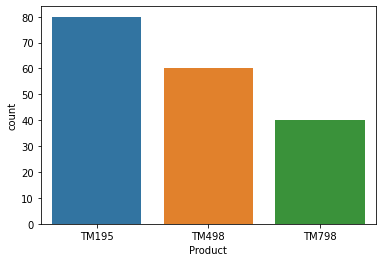

In [4]:
#1.Checking the frequency of the type of product (sales of product indivisually)
print(cardio_data['Product'].value_counts())
sns.countplot(x ='Product', data = cardio_data)
plt.show()
# Analysis  : The TM195 has the highest customers then TM 498 and TM798

Gender  Product
Female  TM195      40
        TM498      29
        TM798       7
Male    TM195      40
        TM798      33
        TM498      31
Name: Product, dtype: int64


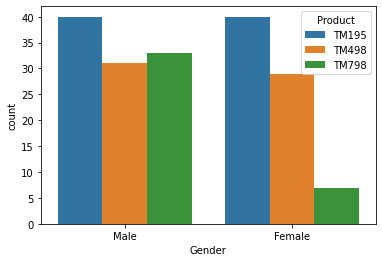

In [5]:
#2.Checking the frequency of the gender based of on the type of product
print(cardio_data.groupby(['Gender'])['Product'].value_counts())
sns.countplot(x ='Gender', data = cardio_data , hue = 'Product')
plt.show()
# Analysis  : both tm195 and tm498 have almost same users 

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64


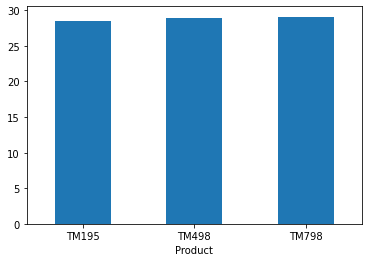

In [6]:
#3.Mean age of the people who purchase the product
print(cardio_data.groupby(['Product'])['Age'].mean())
cardio_data.groupby(['Product'])['Age'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [7]:
#median age data of product
print(cardio_data.groupby(['Product'])['Age'].median())

Product
TM195    26
TM498    26
TM798    27
Name: Age, dtype: int64


In [8]:
# Analysis : mean age of product of all 3 categories is around 28 yrs and median age is around 26 yrs

Product
TM195    15.037500
TM498    15.116667
TM798    17.325000
Name: Education, dtype: float64


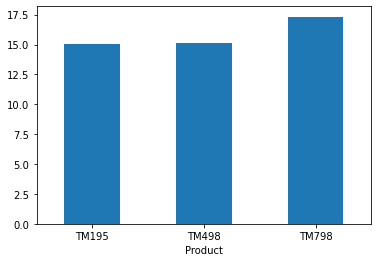

In [9]:
#4.Mean Education level of the people who purchase the product
print(cardio_data.groupby(['Product'])['Education'].mean())
cardio_data.groupby(['Product'])['Education'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
# Analysis : Here we can see that the people using TM798 have the highest level of education

In [10]:
# confidence interval for the same is at 95% (2*SD)

## Treadmill 1 (TM195)
vals = cardio_data[cardio_data['Product'] == 'TM195']['Education']
print('TM195 lower interval : ',vals.mean()-vals.std()*2)
print('TM195 Upper interval :',vals.mean()+vals.std()*2)

## Treadmill 1 (TM498)
vals = cardio_data[cardio_data['Product'] == 'TM498']['Education']
print('TM498 lower interval : ',vals.mean()-vals.std()*2)
print('TM498 Upper interval :',vals.mean()+vals.std()*2)

## Treadmill 1 (TM798)
vals = cardio_data[cardio_data['Product'] == 'TM798']['Education']
print('TM798 lower interval : ',vals.mean()-vals.std()*2)
print('TM798 Upper interval :',vals.mean()+vals.std()*2)

TM195 lower interval :  12.60473317385744
TM195 Upper interval : 17.47026682614256
TM498 lower interval :  12.67156317735454
TM498 Upper interval : 17.56177015597879
TM798 lower interval :  14.046867323283902
TM798 Upper interval : 20.603132676716097


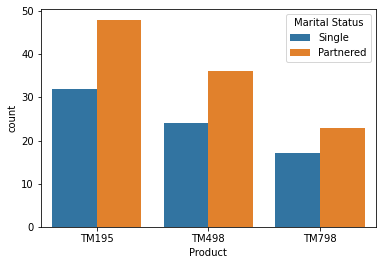

In [11]:
#5.Checking the frequency of the maritial status based of on the type of product
sns.countplot(x ='Product', data = cardio_data , hue = 'Marital Status')
plt.show()
## Analysis : Partners are more interested in buying the machines for cardio

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64


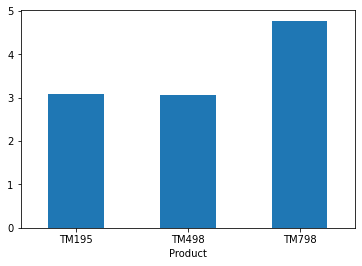

In [12]:
#6.Mean Usage level of the people who purchase the product
print(cardio_data.groupby(['Product'])['Usage'].mean())
cardio_data.groupby(['Product'])['Usage'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [13]:
print(cardio_data.groupby(['Product','Gender'])['Usage'].mean())

Product  Gender
TM195    Female    2.900000
         Male      3.275000
TM498    Female    3.137931
         Male      3.000000
TM798    Female    5.000000
         Male      4.727273
Name: Usage, dtype: float64


In [14]:
# Analysis : The people using TM798 have the highest level of usage and females use it mroe than males

In [15]:
# confidence interval for the same is at 95% (2*SD)

## Treadmill 1 (TM195)
vals = cardio_data[cardio_data['Product'] == 'TM195']['Usage']
print('TM195 lower interval : ',vals.mean()-vals.std()*2)
print('TM195 Upper interval :',vals.mean()+vals.std()*2)

## Treadmill 1 (TM498)
vals = cardio_data[cardio_data['Product'] == 'TM498']['Usage']
print('TM498 lower interval : ',vals.mean()-vals.std()*2)
print('TM498 Upper interval :',vals.mean()+vals.std()*2)

## Treadmill 1 (TM798)
vals = cardio_data[cardio_data['Product'] == 'TM798']['Usage']
print('TM798 lower interval : ',vals.mean()-vals.std()*2)
print('TM798 Upper interval :',vals.mean()+vals.std()*2)

TM195 lower interval :  1.522252415750148
TM195 Upper interval : 4.652747584249852
TM498 lower interval :  1.4672317382011535
TM498 Upper interval : 4.66610159513218
TM798 lower interval :  2.881014918965969
TM798 Upper interval : 6.668985081034032


Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64


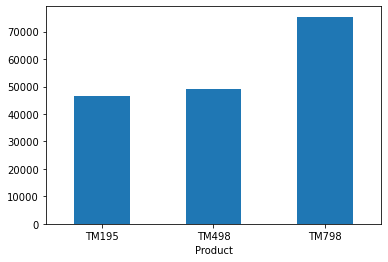

In [16]:
#7.Mean Income of the people who purchase the product
print(cardio_data.groupby(['Product'])['Income'].mean())
cardio_data.groupby(['Product'])['Income'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
# Analysis : The pople owning TM798 have a highest income 

In [17]:
# confidence interval for the same is at 95% (2*SD)

## Treadmill 1 (TM195)
vals = cardio_data[cardio_data['Product'] == 'TM195']['Income']
print('TM195 lower interval : ',vals.mean()-vals.std()*2)
print('TM195 Upper interval :',vals.mean()+vals.std()*2)

## Treadmill 1 (TM498)
vals = cardio_data[cardio_data['Product'] == 'TM498']['Income']
print('TM498 lower interval : ',vals.mean()-vals.std()*2)
print('TM498 Upper interval :',vals.mean()+vals.std()*2)

## Treadmill 1 (TM798)
vals = cardio_data[cardio_data['Product'] == 'TM798']['Income']
print('TM798 lower interval : ',vals.mean()-vals.std()*2)
print('TM798 Upper interval :',vals.mean()+vals.std()*2)

TM195 lower interval :  28266.45862068208
TM195 Upper interval : 64569.59137931792
TM498 lower interval :  31665.671223372054
TM498 Upper interval : 66281.62877662794
TM798 lower interval :  38429.90155973634
TM798 Upper interval : 112453.24844026365


Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64


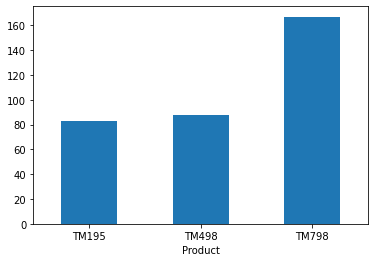

In [18]:
#8.Mean Miles of the people who purchase the product
print(cardio_data.groupby(['Product'])['Miles'].mean())
cardio_data.groupby(['Product'])['Miles'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
# Analysis : TM798 are having most miles

In [19]:
# confidence interval for the same is at 95% (2*SD)

## Treadmill 1 (TM195)
vals = cardio_data[cardio_data['Product'] == 'TM195']['Miles']
print('TM195 lower interval : ',vals.mean()-vals.std()*2)
print('TM195 Upper interval :',vals.mean()+vals.std()*2)

## Treadmill 1 (TM498)
vals = cardio_data[cardio_data['Product'] == 'TM498']['Miles']
print('TM498 lower interval : ',vals.mean()-vals.std()*2)
print('TM498 Upper interval :',vals.mean()+vals.std()*2)

## Treadmill 1 (TM798)
vals = cardio_data[cardio_data['Product'] == 'TM798']['Miles']
print('TM798 lower interval : ',vals.mean()-vals.std()*2)
print('TM798 Upper interval :',vals.mean()+vals.std()*2)

TM195 lower interval :  25.03929601674924
TM195 Upper interval : 140.53570398325076
TM498 lower interval :  21.40706308790051
TM498 Upper interval : 154.45960357876618
TM798 lower interval :  46.76691140922513
TM798 Upper interval : 287.03308859077487


## Statistical Tests

In [50]:
#1. AVG age of people purchasing TM195 is 28

#hypothesis tests

## H0 : mean people purchasing = 28
## H1 : mean people purchasing != 28

data_values = cardio_data[(cardio_data['Product'] == 'TM195') & (cardio_data['Gender'] == 'Male')]['Age']
t_test,pval = stats.ttest_1samp(a = data_values , popmean = 28)
print('pvalue',pval)
print("Confidence interval for the same is : ",stats.t.interval(0.95,df = len(data_values)-1 , loc = data_values.mean()
                                                                , scale = data_values.std()/np.sqrt(len(data_values)) ))

pvalue 0.5827073041634316
Confidence interval for the same is :  (26.277023923131345, 31.02297607686865)


In [21]:
#As p values is more than 0.05 we can fail to reject null hypothesis 
#Confidence interval for the same is :  (26.899265528037244, 32.19164356287185)

In [51]:
#2. AVG usage of TM195 is 3

#hypothesis tests

## H0 : mean people usage less than or equal to 3
## H1 : mean people usage greater than 3

data_values = cardio_data[(cardio_data['Product'] == 'TM195')]['Usage']
# from statsmodels.stats import weightstats as stats
t_test,pval = stats.ttest_1samp(a = data_values , popmean = 3)
print('pvalue',pval)
print("Confidence interval for the same is : ",stats.t.interval(0.95,df = len(data_values)-1 , loc = data_values.mean()
                                                                , scale = data_values.std()/np.sqrt(len(data_values)) ))

pvalue 0.32036371526073226
Confidence interval for the same is :  (2.913335606625931, 3.261664393374069)


In [23]:
#As p values is more than 0.05 we can fail to reject null hypothesis 
#Confidence interval for the same is :  (26.899265528037244, 32.19164356287185)

In [24]:
#3. AVG Education of people purchasing machine is 15

#hypothesis tests

## H0 : mean people Education less than or equal to 15
## H1 : mean people Education greater 15

data_values = cardio_data['Education']
# from statsmodels.stats import weightstats as stats
t_test,pval = stats.ttest_1samp(a = data_values , popmean = 15)
print('pvalue',pval)
print("Confidence interval for the same is : ",stats.t.interval(0.95,df = len(data_values)-1 , loc = data_values.mean()
                                                                , scale = data_values.std()/np.sqrt(len(data_values)) ))

pvalue 4.200577434456929e-06
Confidence interval for the same is :  (15.33438335739613, 15.810061087048316)


In [25]:
#As p values is less than 0.05 we can reject null hypothesis 
#Confidence interval for the same is :  (15.33438335739613, 15.810061087048316)

In [26]:
#4. AVG income of people purchasing TM798 is 75000

#hypothesis tests

## H0 : mean people income = 75000
## H1 : mean people income != 75000

data_values = cardio_data[(cardio_data['Product'] == 'TM798')]['Income']
# from statsmodels.stats import weightstats as stats
t_test,pval = stats.ttest_1samp(a = data_values , popmean = 75000)
print('pvalue',pval)
print("Confidence interval for the same is : ",stats.t.interval(0.95,df = len(data_values)-1 , loc = data_values.mean()
                                                                , scale = data_values.std()/np.sqrt(len(data_values)) ))

pvalue 0.8808224787915397
Confidence interval for the same is :  (69523.1213140159, 81360.0286859841)


In [27]:
# As the p value is more then 0.05 so we cannot reject the null hypothesis 

In [28]:
#5.AVG miles of people getting TM195 is 82 miles

#hypothesis tests

## H0 : mean people Miles = 82
## H1 : mean people Miles != 82

data_values = cardio_data[(cardio_data['Product'] == 'TM195')]['Miles']
# from statsmodels.stats import weightstats as stats
t_test,pval = stats.ttest_1samp(a = data_values , popmean = 82)
print('pvalue',pval)
print("Confidence interval for the same is : ",stats.t.interval(0.95,df = len(data_values)-1 , loc = data_values.mean()
                                                                , scale = data_values.std()/np.sqrt(len(data_values)) ))

pvalue 0.8079079291894233
Confidence interval for the same is :  (76.36188336504124, 89.21311663495875)


In [29]:
# As the p value is more then 0.05 so we cannot reject the null hypothesis 

In [30]:
#6. Relationship in product and the gender

# Hypothesis

## H0 : Gender and product are independent
## H1 : Gender and product are dependent

observed_values = pd.crosstab(cardio_data['Product'],cardio_data['Gender'])
test_Stat,p,dof,expected_val = chi2_contingency(observed = observed_values)
print('pvalue',p)

pvalue 0.0015617972833158714


In [31]:
## Here as we can see that the pvalue is 0.0015 which is less than 0.05 so we reject the null hypothesis 

In [32]:
#7. AVG Education is same for all

#hypothesis :

# H0 : The average is same
# H1 : The average diff

TM195 = cardio_data[(cardio_data['Product'] == 'TM195')]['Education']
TM498 = cardio_data[(cardio_data['Product'] == 'TM498')]['Education']
TM798 = cardio_data[(cardio_data['Product'] == 'TM798')]['Education']

ftest,pval = f_oneway(TM195,TM498,TM798)
print('pvalue',pval)

pvalue 1.3951292571863684e-16


In [33]:
# As the p value is lesser than 0.05 so we reject the null hypothesis 

## Confidence intervals calculations

In [43]:
#TM195 data description 
data_values = cardio_data[cardio_data['Product'] == 'TM195']
data_values.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


In [32]:
def confidence_interval(percentage,values):
    z_values = {70:1.036,80:1.282,85:1.440,90:1.645,95:1.960,98:2.326,99:2.576}
    upper_bound = values.mean()+z_values[percentage]*(values.std()/np.sqrt(len(values)))
    lower_bound = values.mean()-z_values[percentage]*(values.std()/np.sqrt(len(values)))
    return upper_bound,lower_bound

In [52]:
#Education CI
data_values = cardio_data[cardio_data['Product'] == 'TM195']['Education']
upper,lower = confidence_interval(99,vals)

intervals = [70,80,85,90,95,98,99]
Education_log = []
for val in intervals:
    upper,lower = confidence_interval(val,data_values)
    Education_log.append([val,lower,upper])
pd.DataFrame(Education_log,columns=["CI",'Lower','Upper'])

,CI,Lower,Upper
0,70,14.896608,15.178392
1,80,14.863153,15.211847
2,85,14.841666,15.233334
3,90,14.813787,15.261213
4,95,14.770948,15.304052
5,98,14.721174,15.353826
6,99,14.687175,15.387825


In [48]:
#INCOME CI
data_values = cardio_data[cardio_data['Product'] == 'TM195']['Income']
upper,lower = confidence_interval(99,vals)

intervals = [70,80,85,90,95,98,99]
Education_log = []
for val in intervals:
    upper,lower = confidence_interval(val,data_values)
    Education_log.append([val,lower,upper])
pd.DataFrame(Education_log,columns=["CI",'Lower','Upper'])

,CI,Lower,Upper
0,70,45366.792269,47469.257731
1,80,45117.175231,47718.874769
2,85,44956.852092,47879.197908
3,90,44748.837894,48087.212106
4,95,44429.206320,48406.843680
5,98,44057.824873,48778.225127
6,99,43804.149021,49031.900979
